<h1 style="font-size: 230%;"> Indian Premier League Data Analysis 2008-2019</h1> <a name="top"></a>

## ***Tarun Kamboj***

---

# Table of contents
---
* [Introduction](#introduction)
* [Data](#data)
* [Exploratory Analysis](#analysis)
    * [Teams Analysis](#teams)
    * [Batsmen Analysis](#batsmen)
    * [Bowlers Analysis](#bowlers)
    * [SuperOvers Analysis](#superovers)
    * [Venue Analysis](#venue)
* [Results and Discussion](#results)

<a name="introduction"></a>

---
# Introduction
---
If you are an Indian, `IPL` need no introduction but if you're not then `IPL` or `Indian Premier League` is probably the most exciting cricket tournament, in which cricket teams named over Indian cities but having players from all around the world participates. <br>
Sports data analytics are used not only in cricket but many other sports for improving the overall team performance and maximizing winning chances.
Real-time data analytics can help in gaining insights even during the game for changing tactics by the team and by associated businesses for economic benefits and growth.<br>
Besides historical analysis, predictive models are harnessed to determine the possible match outcomes that require significant number crunching and data science know-how, visualization tools and capability to include newer observations in the analysis.
In this work, we'll try to explore and analyse some data regarding `IPL`.

Let's import all the dependencies first.

In [1]:
import pandas as pd  # for handling the datsets 
import seaborn as sns  # for visualisation
import matplotlib.pyplot as plt  # for visualisation
plt.style.use('ggplot') #  for ggplot like styling
%matplotlib inline  
# for inline rendering of images produced by matplolib

[Go to Top](#top) <a name="data"></a>

---
# Data 
---
We'll use two datasets, one containing the record of all the matches and second containing the record of every ball delivered. The datsets are available [here](https://bit.ly/34SRn3b). They contains the record of matches played in IPL seasons **2008-2019** only. The data is already cleaned and processed, so we don't need to bother about it and we can dive straight into analysis and visualization.

In [2]:
matches = pd.read_csv('matches.csv')  # loading csv file into dataframe
deliveries = pd.read_csv('deliveries.csv')  # loading csv file into dataframe

Let's take a look at the dataset containing matches.

In [3]:
matches.head()  # displaying first five rows of the dataframe

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


As we can see this dataset contains the attributes such as
* `id` - match id
* `season` - ipl season
* `city` - location of match
* `date` - date of match
* `team1 & team2` - name of teams playing the match
* `toss_winner` - team winning the toss
* `toss_decision `- decision to bat/bowl
* `result` - match result: normal/tie/no result
* `dl_applied` - application of dl method (binary value 0 or 1)
* `win_by_runs` - runs a team won the match by
* `win_by_wickets` - wickets a team won the match by
* `player_of_match` - best performer of the match
* `venue` - stadium at which match is played
* `umpire1,2,3` - names of umpires

Now let's take a look at the other dataset.

In [4]:
deliveries.head()  # displaying first five rows of the dataframe

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


This dataset contains the record of balls delevered in each match and has attributes like
* `match_id` - match id
* `inning` - 1st or 2nd inning
* `batting_team` - name of batting team
* `bowling_team` - name of bowling team
* `over` - over number in the innings
* `ball` - ball number in the over
* `batsman` - name of batsman on strike
* `non_striker` - name of batsman at non-striker end
* `bowler` - name of bowler
* `is_super_over` - is it a super over? (binary value 0 or 1)
* `wide_runs` - how many runs conceded by wide
* `bye_runs` - number of bye runs conceded
* `legbye_runs` - number of leg bye runs conceded
* `noball_runs` - number of no ball runs conceded
* `penalty_runs` - number of penalty runs conceded
* `batsman_runs` - number of runs scored by batsman
* `total_runs` - total runs off the ball
* `player_dismissed` - name of the batsman dismissed
* `dismissal_kind` - how the bastman is dismissed(LBW, hit-wicket, run-out, etc)
* `fielder` - name of the player fielding the ball

[Go to Top](#top) <a name="analysis"></a>

---
# Exploratory Analysis
---
Let's start the analysis of the data. The analysis is in the manner that,
    frist, we'll analyse the overall [teams'](#teams) performances,
    then we'll analyse the performances of [batsmen](#batsmen),
    after that [bowling](#bowlers) performances, [superover](#superovers) analysis and then [venue](#venue) and toss analysis. 

 <a name="teams"></a>
 
 ---
## Teams Analysis
---
We'll try to find out the most successful team in the league. First, let's change the names of teams with their abbreviated names for simplicity.

In [5]:
matches['team1'].unique()  # viewing all the unique values in the column team1

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [6]:
x = ['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions', 
    'Rising Pune Supergiant', 'Royal Challengers Bangalore',
    'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
    'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']  # list of the values to be replaced

y = ['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','SRH','KTK','PW','RPS','DC']  # list of the values to be replaced with

matches.replace(x, y, inplace = True)  #  replacing all values of x with y in dataframe matches
deliveries.replace(x, y, inplace = True) 

Now let's see which team has won maximum number of IPL seasons.

<AxesSubplot:title={'center':'Number of IPL season each team Won'}>

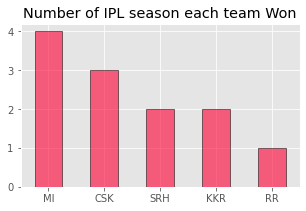

In [7]:
season_winner = matches.drop_duplicates(subset=['season'],keep='last')[['season', 'winner']].reset_index(drop=True)
# getting the winner of each season
season_winner.winner.value_counts().plot(kind='bar', title='Number of IPL season each team Won', figsize=(5,3), width=0.5, color=(1, 0, 0.2, 0.6), 
                                         edgecolor='black', rot=0)   # plotting the bar graph

As we can see here that MI have won the maximum number of IPL season. CSK is on the second spot. Winning maximum seasons also shows the teams' capabilities to win matches in playoffs, as most teams have almost same points in the league but thier ability to win matches in the playoffs leads them on to winning the season.

Now let's view some other stats of each team.

In [8]:
team_stats = pd.DataFrame({    # making a dataframe for stats of every team
    'Played': matches.team1.value_counts() + matches.team2.value_counts(),   # calculating total matches played by each team
    'Won': matches.winner.value_counts(),   # calculating total matches won by each team
    'Lost': ((matches.team1.value_counts() + matches.team2.value_counts()) - matches.winner.value_counts()),   # calculating total matches lost by each team
    'Toss won': matches.toss_winner.value_counts()   # calculating tosses won by each team
})
team_stats['Win percentage'] = (team_stats['Won']/team_stats['Played'])*100  # calculating win percentage of each team
team_stats

,Played,Won,Lost,Toss won,Win percentage
CSK,164,100,64,89,60.975610
DC,177,77,100,90,43.502825
GL,30,13,17,15,43.333333
KKR,178,92,86,92,51.685393
KTK,14,6,8,8,42.857143
KXIP,176,82,94,81,46.590909
MI,187,109,78,98,58.288770
PW,46,12,34,20,26.086957
RCB,180,84,96,81,46.666667
RPS,30,15,15,13,50.000000


Reading stats like these is not easy. We need to visualize it for better understanding. But which attribute should we visualise in order to assume the best performing teams? Clearly `win percentage` would be best for it. So let's see the teams with highest win percentage.

<AxesSubplot:title={'center':'Win percentage'}>

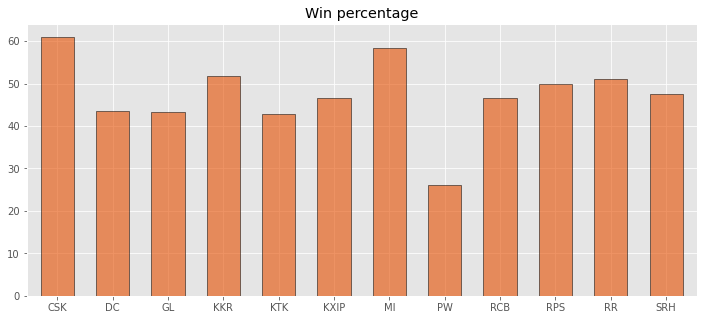

In [9]:
team_stats['Win percentage'].plot(kind='bar', title='Win percentage', figsize=(12,5), width=0.6, color=(0.9, 0.3, 0 , 0.6), edgecolor='black', rot=0)
# plotting the bar graph for win percentage of each team

As we can see in the bar plot, CSK and MI are having win percentage considerably higher than other teams. So, it's safe to assume them as the strongest teams but MI has won more titles so we can say that MI is the strongest team in IPL.

[Go to Top](#top) <a name="batsmen"></a>

---
## Batsmen Analysis
---

Now, let's try to find out the best batsmen. For that, we'll first caculate matches played by each batsman to be used later in calculating other stats.

In [10]:
matches_played = {}  # dictionary for storing matches played by each batsman
def MatchesPlayed(df):  # function for calculating matches played by each batsman
    for m in df.batsman.unique():  # for loop for iterating through the series of batsmen
        if m in matches_played:
            matches_played[m] += 1  # incrementing if batsman's record is already in the dictionary
        else:
            matches_played[m] = 1  # initializing if batsman's record is not in the dictionary
deliveries.groupby('match_id').apply(MatchesPlayed)  # applying the function on the dataset

""


Let's calculate other stats such as balls faced, runs scored, strike rate and average runs of every batsman.

In [11]:
batsmen_summary = deliveries.groupby("batsman").agg({'ball': 'count','batsman_runs': 'sum'})  # calculating balls and runs of each batsman
batsmen_summary.rename(columns={'ball':'Balls', 'batsman_runs': 'Runs'}, inplace=True)  #  renaming the columns
batsmen_summary['Strike Rate'] = (batsmen_summary['Runs']/batsmen_summary['Balls'] * 100).round(2)  # calculating the strike rate
batsmen_summary['Matches Played'] = [matches_played[m] for m in batsmen_summary.index]  # adding the matches played by each batsman
batsmen_summary['Average']= (batsmen_summary['Runs']/batsmen_summary['Matches Played']).round(2)  # calculating average runs
batsmen_summary.head()

,Balls,Runs,Strike Rate,Matches Played,Average
batsman,,,,,
A Ashish Reddy,196,280,142.86,23,12.17
A Chandila,7,4,57.14,2,2.00
A Chopra,75,53,70.67,6,8.83
A Choudhary,20,25,125.00,3,8.33
A Dananjaya,5,4,80.00,1,4.00


Let's view the batsmen who've scored the most runs.

<AxesSubplot:title={'center':'Most Runs'}, xlabel='batsman'>

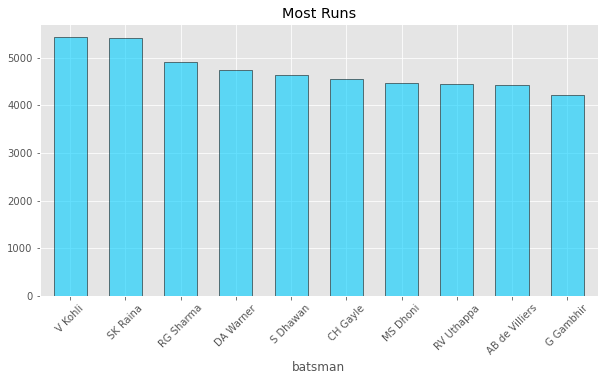

In [12]:
most_runs = batsmen_summary.sort_values(['Runs'], ascending=False)[:10]['Runs']  # making a dataframe for top 10 run scorer
most_runs.plot(kind='bar', title='Most Runs', figsize=(10,5), width=0.6, color=(0, 0.8, 1 , 0.6), edgecolor='black', rot=45)  # visualising top 10 run scorer

Virat Kohli and Suresh Raina are the top scorers in this graph. While it may seem impressive, but having `most runs` is just a `record making` thing and not a `match winning` thing. A good batsman is the one who shows consistency i.e, who scores high runs on average. Now let's see who has the best average.

<AxesSubplot:title={'center':'Best Average'}, xlabel='batsman'>

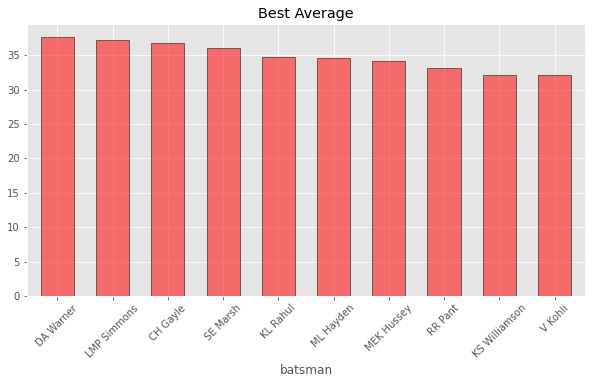

In [13]:
batsmen_100 = batsmen_summary.sort_values(['Balls'], ascending=False)[:100]  # taking 100 batsmen who've played most balls for non-biased results
best_average = batsmen_100.sort_values(['Average'], ascending=False)[:10]['Average']  #  top 10 batsmen with highest average runs
best_average.plot(kind='bar', title='Best Average', figsize=(10,5), width=0.6, color=(1, 0.1, 0.1 , 0.6), edgecolor='black', rot=45) # visualising using bar chart

David warner comes on top in case of best average. But what about the strike rate? Since IPL is a limited over tournament and 20 overs at that, strike rate becomes one of the most important factor. Let's see the batsmen having the highest strike rates.

<AxesSubplot:title={'center':'Best Strike Rate'}, xlabel='batsman'>

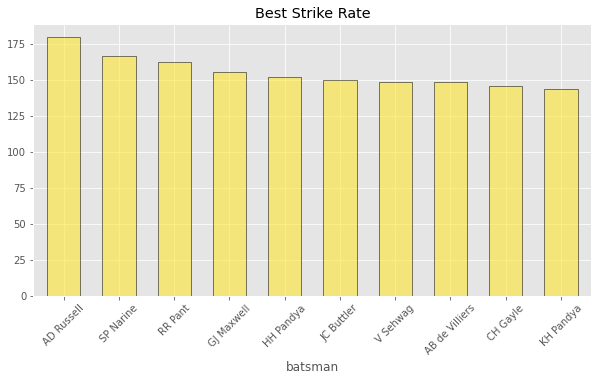

In [14]:
best_strike_rate = batsmen_100.sort_values(['Strike Rate'], ascending=False)[:10]['Strike Rate']  #  top 10 batsmen with highest strike rate
best_strike_rate.plot(kind='bar', title='Best Strike Rate', figsize=(10,5), width=0.6, color=(1, 0.9, 0.2, 0.6), edgecolor='black', rot=45)  # visualising using bar chart

The story is completely different here. Players like Andre Russell, Sunil Narine, Rishabh Pant, Glenn Maxwell and Hardik Pandya are having the best strike rates. These batsmen, having high strike rates, are also called `Explosive Batsmen`. While they have a high strike rate, they don't have a high average score. Hence they are suitable for batting in middle and lower middle orders. Explosive batsmen batting in the depth overs can give a certain boost to the total score. 

IPL or 20 over tournaments in general, are fun to watch because of breathtaking 6's. While sixes are also important for high strike rate, they also lead to high total score. And we all know, that high total scores makes the matches more exiting. So let's take a look at players with most 6's.

<AxesSubplot:title={'center':'Most Sixes'}, xlabel='batsman'>

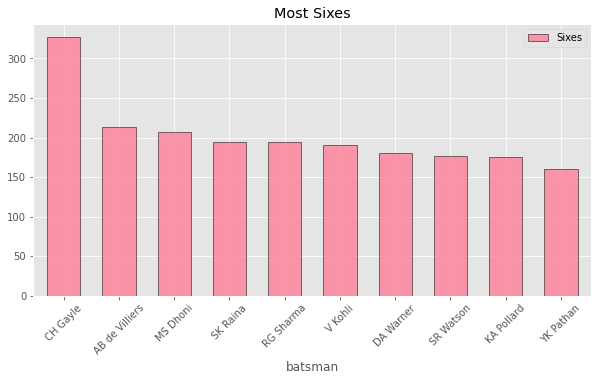

In [15]:
sixes = deliveries[deliveries[ "batsman_runs"] == 6]  # making a dataframe containing all 6's 
most_sixes = sixes.groupby("batsman").agg({'batsman_runs': 'count'}).sort_values(['batsman_runs'], ascending=False)[:10] # top 10 batsmen with most 6's
most_sixes.rename(columns={'batsman_runs': 'Sixes'}, inplace=True)  # renaming the column
most_sixes.plot(kind='bar', title='Most Sixes', figsize=(10,5), width=0.6, color=(1, 0.5, 0.6, 0.8), edgecolor='black', rot=45) # visualising using bar chart

Woah!! look at that. Chris Gayle has complete dominance when it comes to hitting 6's. But hitting more and more 6's are often considered risky and hitting 4's is considered comparatively safe. So lets see the players with most fours.

<AxesSubplot:title={'center':'Most Fours'}, xlabel='batsman'>

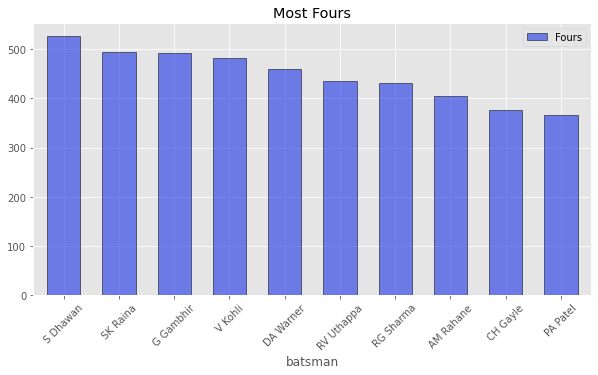

In [16]:
fours = deliveries[deliveries[ "batsman_runs"] == 4]  # making a dataframe containing all 4's 
most_fours = fours.groupby("batsman").agg({'batsman_runs': 'count'}).sort_values(['batsman_runs'], ascending=False)[:10] # top 10 batsmen with most 4's
most_fours.rename(columns={'batsman_runs': 'Fours'}, inplace=True)  # renaming the column
most_fours.plot(kind='bar', title='Most Fours', figsize=(10,5), width=0.6, color=(0.1, 0.2, 0.9, 0.6), edgecolor='black', rot=45)  # visualising using bar chart

Shikhar Dhawan comes on top in case of most 4's. But Chris Gayle is not too behind here too. But how do we know which player performed good most of the times. A simple way for this is to compare number of `Payer of the Match` titles won by each player.

<AxesSubplot:title={'center':'Most Player of the Match Winner'}, xlabel='Player'>

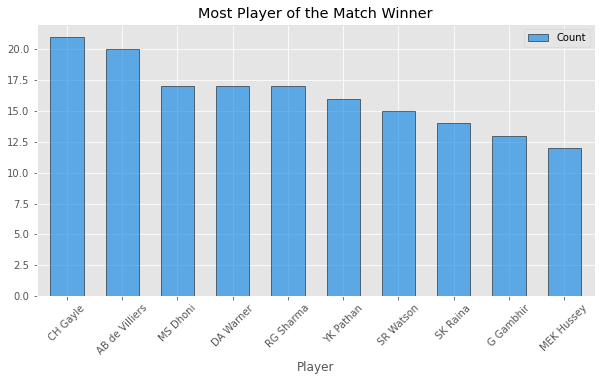

In [17]:
pom = pd.DataFrame({  # making a dataframe for players of the match
    'Player': (matches['player_of_match']),
    'Count': 1
})
pom = pom.groupby('Player').count().sort_values(['Count'], ascending=False)[:10]  # counting no. of player of the match titles won by each player
pom.plot(kind='bar', title='Most Player of the Match Winner', figsize=(10,5), width=0.6, color=(0, 0.5, 0.9, 0.6), edgecolor='black', rot=45)  # bar chart

Chris Gayle and AB de Villiers have complete dominance in this category. But does it mean that they are the best batsmen? Well they should be but what about other good batsmen? If we look at every visualization above, we can see that players like David Warner, MS Dhoni, KL Rahul, Rohit Sharma and Virat Kohli have also performed good in many categories. So these are also valuable players for their respective team.

[Go to Top](#top) <a name="bowlers"></a>

---
## Bowlers Analysis
---
Now, let's try to find out the best bowlers. For that purpose we'll need to calculate the stats of each bowler first.

In [18]:
def f():   # function to act as a filter which counts the values greater than 0, this function is passed in the aggregate function in next cell
    def ipf(x):         # Note: copied from stackoverflow =D
        return (x > 0).sum()  
    return ipf 

In [19]:
bowlers = deliveries.groupby('bowler').aggregate({'ball': 'count', 'total_runs': 'sum','wide_runs': f(), 'noball_runs': f(), 'player_dismissed' : 'count'})
  # calculating balls, runs, wides, noballs and wickets of each bowler
bowlers.columns = ['Balls','Runs','Wides','Noballs','Wickets']  # renaming the columns
bowlers = bowlers.sort_values(['Balls'], ascending=False)[:150]  # taking 150 bowlers who've bowled most balls for non-biased results
bowlers['Economy'] = bowlers['Runs']/(bowlers['Balls']/6)   # calculating economy of each bowler
bowlers.head()

,Balls,Runs,Wides,Noballs,Wickets,Economy
bowler,,,,,,
Harbhajan Singh,3451,4050,74,3,161,7.041437
A Mishra,3172,3850,50,20,165,7.282472
PP Chawla,3157,4153,31,1,156,7.892936
R Ashwin,3016,3391,89,2,138,6.746021
SL Malinga,2974,3511,129,18,188,7.083389


Now that we have the neccessary stats, lets view the top wicket takers of the league as the wicket taking ability of a bowler is considered very important.

<AxesSubplot:title={'center':'Most Wickets'}, xlabel='bowler'>

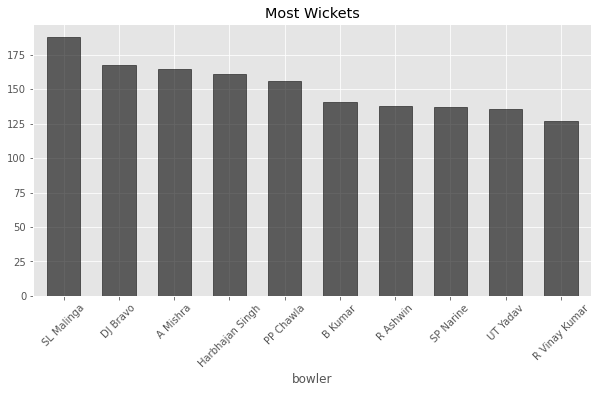

In [20]:
most_wickets = bowlers.sort_values(['Wickets'], ascending=False)[:10]['Wickets']   #  top 10 bowlers with most wickets
most_wickets.plot(kind='bar', title='Most Wickets', figsize=(10,5), width=0.6, color=(0, 0, 0 , 0.6), edgecolor='black', rot=45)  # bar chart

Lasith Malinga is the top wicket taker as shown in the graph, followed by Dwayne Bravo, Amit Mishra and Harbhajan Singh. But it doesn't matter that how many wickets a bowler has taken in a match, if he has given a lot of runs and the opponent manages to get a high total. Economy is what decides how efficient the bowler is and helps in keeping the opponent's total score low. So lets take a look at bowlers with best economy.

<AxesSubplot:title={'center':'Best Economy'}, xlabel='bowler'>

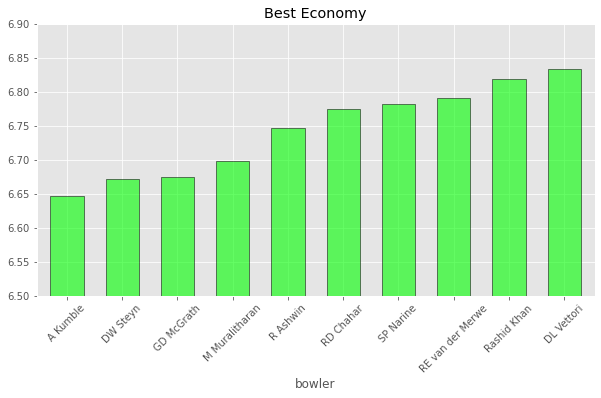

In [21]:
best_economy = bowlers.sort_values(['Economy'], ascending=True)[:10]['Economy']  #  top 10 bowlers with best economy
best_economy.plot(kind='bar', title='Best Economy', figsize=(10,5), width=0.6, color=(0, 1, 0 , 0.6), edgecolor='black', rot=45, ylim=(6.5,6.9)) # bar chart

The story is completely different here. While Anil Kumble has the lowest economy but if we see both the charts, we notice that Ravi Ashwin and Sunil Narine are having low economy and high wickets. Just for fun, lets take a look at how many wides and noballs these bowlers have bowled.

<AxesSubplot:title={'center':'Wides & Noballs'}, xlabel='bowler'>

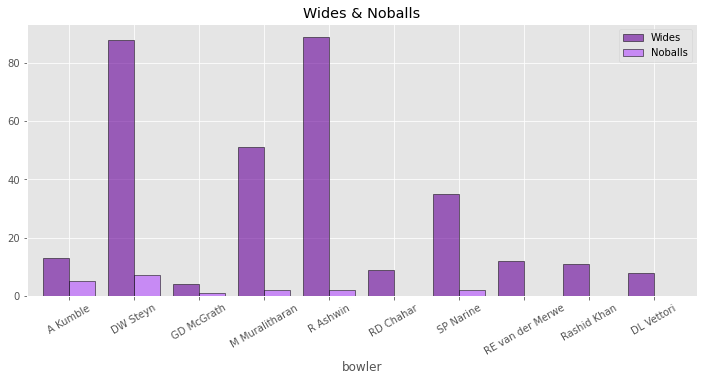

In [22]:
wides_noballs = bowlers.sort_values(['Economy'], ascending=True)[:10][['Wides','Noballs']]  # calculating wides and noballs of top wicket takers
wides_noballs.plot.bar(title='Wides & Noballs', figsize=(12,5), width=0.8, color=[(0.4, 0, 0.6, 0.6),(0.7, 0.3, 1, 0.6)], edgecolor='black', rot=30)  # bar chart

(⊙ˍ⊙) looks like Ashwin is at the top in this list.

[Go to Top](#top) <a name="superovers"></a>

---
## SuperOvers Analysis
---
A Super Over is a tie-breaking method, where both teams play a single, additional over of six balls to determine the winner of the match. A match which goes to a Super Over is officially declared a "tie", and won by the team who score the most runs in the Super Over which makes them thrilling. It is highly important for players to play at their best in the super over because the result of match depends on it. 

Let's try to find the best batsmen and bowlers for super overs.

In [23]:
super_overs = deliveries[deliveries.is_super_over == 1]  # making a separate dataframe of deliveries delivered in super overs

Now that we have the dataframe containing all the deliveries delivered in super overs, lets analyse batting performances first.

In [24]:
super_overs_batsmen = super_overs.groupby("batsman").agg({'ball': 'count','batsman_runs': 'sum'})  # calculating balls and runs of each batsman in super overs
super_overs_batsmen.rename(columns={'ball':'Balls', 'batsman_runs': 'Runs'}, inplace=True)   #  renaming the columns
super_overs_batsmen['Strike Rate'] = (super_overs_batsmen['Runs']/super_overs_batsmen['Balls'] * 100).round(2)  # calculating the strike rate

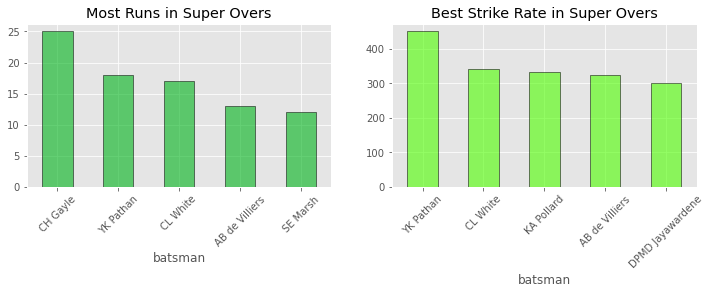

In [25]:
runs = super_overs_batsmen.sort_values(['Runs'], ascending=False)[:5]['Runs']  #  getting top 5 scorer in super overs
strikerate = super_overs_batsmen.sort_values(['Strike Rate'], ascending=False)[:5]['Strike Rate']  #  getting 5 batsmen with highest strike rate in super overs

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))  #  setting up the figure and axes
runs.plot(kind='bar', title='Most Runs in Super Overs', width=0.5, color=(0, 0.7, 0.1 , 0.6), edgecolor='black', rot=45, ax=axes[0])  # ploting first subplot
strikerate.plot(kind='bar', title='Best Strike Rate in Super Overs', width=0.5, color=(0.3, 1, 0 , 0.6), edgecolor='black', rot=45, ax=axes[1]) # ploting second subplot
plt.show()  # showing the plot

As we can see in the charts, Yusuf Pathan, CL White and AB de Villiers seems to be having an explosive strike rate as well as good runs which makes them strong candidates for playing in super overs.

Let's analyse bowling performances now.

In [26]:
super_overs_bowlers = super_overs.groupby('bowler').aggregate({'ball': 'count', 'total_runs': 'sum', 'player_dismissed' : 'count'})
  # calculating balls, runs and wickets of  bowlers in super overs
super_overs_bowlers.columns = ['Balls','Runs','Wickets']  # renaming the columns
super_overs_bowlers['Economy'] = super_overs_bowlers['Runs']/(super_overs_bowlers['Balls']/6)   # calculating economy of bowlers

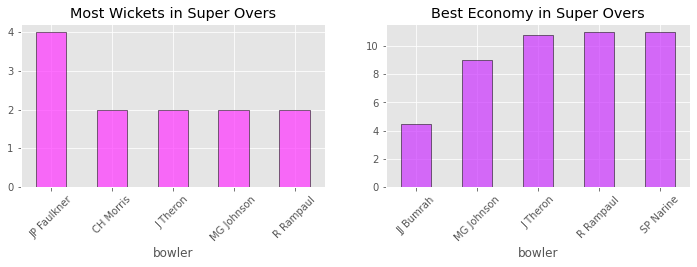

In [27]:
wickets = super_overs_bowlers.sort_values(['Wickets'], ascending=False)[:5]['Wickets']  #  getting top 5 wicket takers in super overs
economy = super_overs_bowlers.sort_values(['Economy'], ascending=True)[:5]['Economy']  #  getting 5 bowlers with best economy in super overs

fig1, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(12,3))  #  setting up the figure and axes
wickets.plot(kind='bar', title='Most Wickets in Super Overs', width=0.5, color=(1, 0.2 , 1 , 0.7), edgecolor='black', rot=45, ax=axes1[0])  # ploting first subplot
economy.plot(kind='bar', title='Best Economy in Super Overs', width=0.5, color=(0.8, 0.2, 1 , 0.7), edgecolor='black', rot=45, ax=axes1[1]) # ploting second subplot
plt.show()  # showing the plot

While James Faulkner may seem like a good recommendation here, but the key to win in super overs is low economy. So Jasprit Bumrah is probably the best bowler to bowl in super overs.

[Go to Top](#top) <a name="venue"></a>

---
## Venue Analysis
---
Unlike other sports, cricket stadium’s size and shape is not fixed except the dimensions of the inner circle and pitch which are 30 yards and 22 yards respectively.  Outfield variations and pitch can have a substantiate effect on bowling and batting and hence it can change the outcome of the match too. So now we'll try to visualize the affect of venue on the outcome of the match. 

We'll find the most popular cricket stadium i.e, the cricket stadium where most number of matches are played.

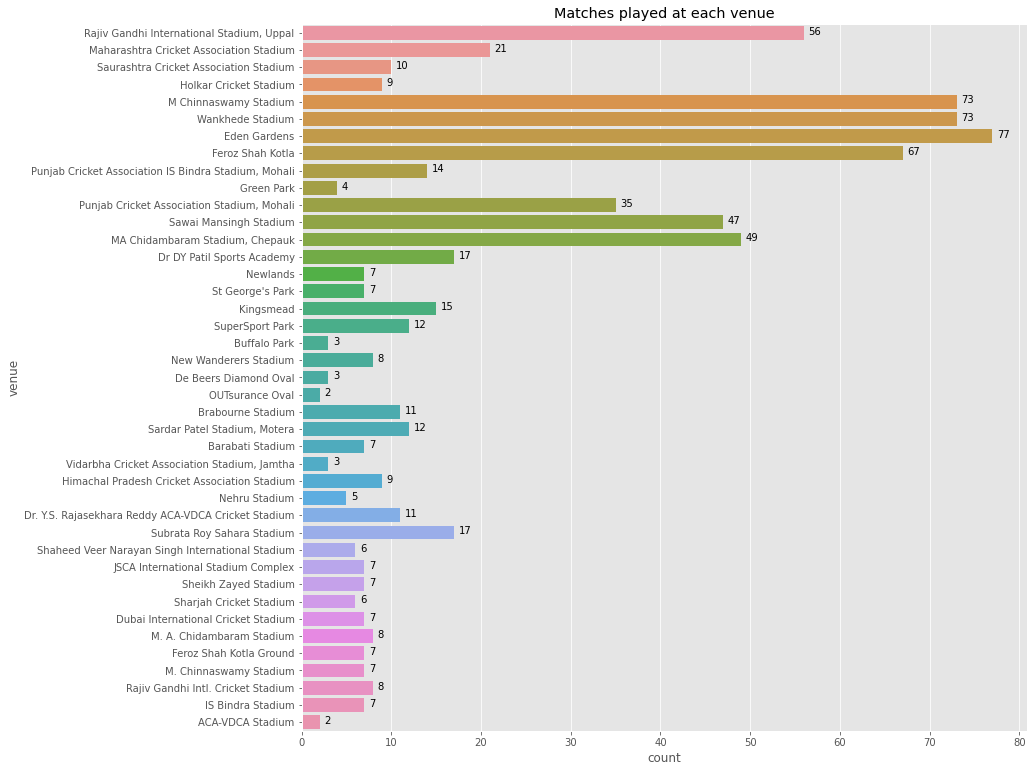

In [28]:
plt.figure(figsize=(13,13))  # setting up the figure size
ax = sns.countplot(data=matches,y='venue')  # count plot for no. of matches at each venue
for patch in ax.patches:     #  for loop to iterate through each patch in the plot
    ax.annotate(format(patch.get_width()), (patch.get_width()+0.5,patch.get_y()+0.5, ))  # annotating each patch
plt.title('Matches played at each venue')  # giving a title to the plot
plt.show()  # showing the plot

It seems that `Eden Gardens` is the venue with most number of matches. So let's get the data of all the matches played at Eden Gardens.

In [29]:
venue = matches[matches.venue == 'Eden Gardens']  # making a data frame for matches played at eden gardens
venue.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
10,11,2017,Kolkata,2017-04-13,KXIP,KKR,KKR,field,normal,0,KKR,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN
13,14,2017,Kolkata,2017-04-15,KKR,SRH,SRH,field,normal,0,KKR,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
22,23,2017,Kolkata,2017-04-21,KKR,GL,GL,field,normal,0,GL,0,4,SK Raina,Eden Gardens,CB Gaffaney,Nitin Menon,NaN
26,27,2017,Kolkata,2017-04-23,KKR,RCB,RCB,field,normal,0,KKR,82,0,NM Coulter-Nile,Eden Gardens,CB Gaffaney,CK Nandan,NaN
30,31,2017,Kolkata,2017-04-28,DC,KKR,KKR,field,normal,0,KKR,0,7,G Gambhir,Eden Gardens,NJ Llong,S Ravi,NaN


Now that we have the required dataframe let's see which team has won the maximum number of matches here.

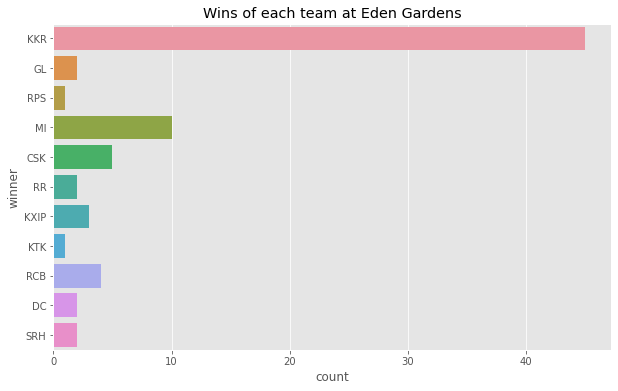

In [30]:
plt.figure(figsize=(10,6))  # setting up the figure size
ax1 = sns.countplot(data=venue,y='winner')   # count plot for no. of matches each team won at eden gardens
plt.title('Wins of each team at Eden Gardens')  # giving a title to the plot
plt.show()  # showing the plot

It should not be surprising, since home team wins most of the matches held at their homeground and Eden Gardens is the home ground of KKR. If we try to look at the other teams, we can see that MI has won considerably high number of matches which shows their dominance in the league.

Now lets see whether a team has more chances of winning if it `Bats First` or if it `Bowls First` at the Eden Gardens.

In [31]:
batting_first_wins, bowling_first_wins = 0, 0    # declaring variables to keep records of the no. of times either the batting first team won or lost
for m,n in zip(venue.win_by_runs,venue.win_by_wickets):    # for loop to iterate through each match
    if m>0:                           # if team has won by runs i.e, batting first
        batting_first_wins+=1    # incrementing batting first variable value
    if n>0:                            # if team has won by wickets i.e, bowling first
        bowling_first_wins+=1    # incrementing bowling first variable value

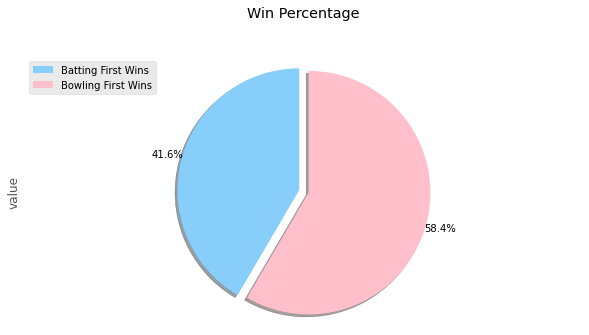

In [32]:
df = pd.DataFrame({'index':['Batting First Wins','Bowling First Wins'], 'value':[batting_first_wins, bowling_first_wins]})
#  creating a data frame for the data calculated above
df.set_index(['index'], inplace=True)  # setting the column index as actual index
df['value'].plot(kind='pie', figsize=(10, 5), autopct='%1.1f%%', startangle=90, shadow=True, labels=None, pctdistance=1.12, 
                 colors=['lightskyblue', 'pink'], explode=[0.04, 0.04])   #  ploting a pie chart for the dataframe
plt.title('Win Percentage', y=1.12)   # giving a title to the plot
plt.axis('equal')  #  setting the axis equal to each other
plt.legend(labels=df.index, loc='upper left')   # giving a legend to the plot
plt.show()  # showing the plot

Hmm.. interesting. The teams have ~17 percent more chances of winning if it bowls first and chases the target instead of batting first and then defending the target. Which is considerably high. The plot is looking pretty though :-P

Let's see if toss has something to do with the result or not.

In [33]:
toss_winner_wins, toss_winner_loses = 0, 0  # declaring variables to keep records of the no. of times either the toss winner won or lost the match
for m,n in zip(venue.toss_winner,venue.winner):    # for loop to iterate through each match
    if m==n:                        # if the toss winner won the match
        toss_winner_wins+=1      # incrementing toss_winner_wins variable value
    else:                             # if the toss winner lost the match
        toss_winner_loses+=1     # incrementing toss_winner_loses variable value

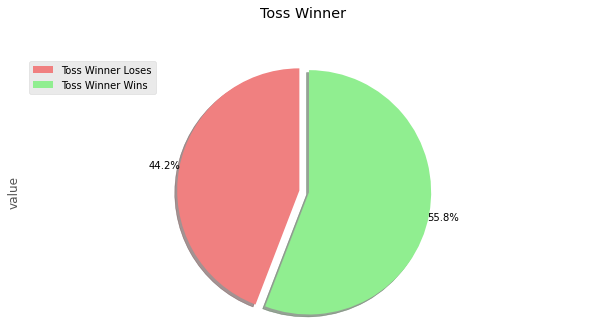

In [34]:
toss_winner = pd.DataFrame({'index':['Toss Winner Loses','Toss Winner Wins'], 'value':[toss_winner_loses, toss_winner_wins]})
#  creating a data frame for the data calculated above
toss_winner.set_index(['index'], inplace=True)  # setting the column index as actual index
toss_winner['value'].plot(kind='pie', figsize=(10, 5), autopct='%1.1f%%', startangle=90, shadow=True, labels=None, pctdistance=1.12, 
                 colors=['lightcoral', 'lightgreen'], explode=[0.04, 0.04]) 
plt.title('Toss Winner', y=1.12)      # giving a title to the plot
plt.axis('equal')  #  setting the axis equal to each other
plt.legend(labels=toss_winner.index, loc='upper left') # giving a legend to the plot
plt.show()  # showing the plot

This chart shows that nearly 56 times out of 100, the team which has won the toss, end up winning the match too. So toss do has an impact on the final outcome with over 11 percent more chances of the toss winner to win the match. In the same fashion, any venue can be analysed.

[Go to Top](#top) <a name="results"></a>

---
# Results and Discussion 
---

The outcome of the match depends on various factors and players sometimes changs it with their exceptional performances, so these figures should never be taken for granted. However, sports data analytics are used for improving the overall team performance and maximizing winning chances. Following are the results of our analysis. 

**Teams Analysis**

`Mumbai Indians` have won the maximum number of IPL season and also has one of the highest win percentage which makes it the most successful team in IPL.
`Chennai Super Kings` comes at second winning the second highest number of titles and highest winning percentage.

**Batsmen Analysis**

`Chris Gayle` and `AB de Villiers` dominates most of the results of the analysis conducted above and hence can be considered as best while batsmen like `David Warner`, `MS Dhoni` and `Rohit Sharma` has also proved their values among the years. Other good batsmen, according to the analysis are `KL Rahul`,  `Suresh Raina` and `Virat Kohli`. 

**Bowlers Analysis**

`Anil Kumble` is at the top of the list in terms of having the best economy while `Lasith Malinga` has taken most number of wickets. Other good bowlers are `Dwayne Bravo`, `Harbhajan Singh`, `Bhuvneshwar Kumar`, `R Ashwin`, `Sunil Narine` and `Rashid Khan`.

**SuperOver Analysis**

In Batting, `Yusuf Pathan` and `AB de Villiers` are the best candidates while other good players are `Chris Gayle` and `kieran Pollard`.
In bowling, `Jasprit Bumrah` is probably the best bowler to bowl in super overs.

**Venue Analysis**

As we have seen in the analysis of `Eden Gardens`, there are high chances that at the `Home Ground`, the `Home Team` will win the match. Other than that, the teams have `~17 percent more` chances if it `Bowls First`and over `11 percent more` chances of winning the match if it wins the toss.

This concludes the exploratory analysis of IPL. I hope you liked my work. Please give your valuable feedback.

## Thanks for viewing!

<!--  -->